# Project: Investigate a Dataset - TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This investigation looks at a data set containing information regarding 10,000 movies collected from 'The Movie Database' website (TMDb), including user ratings and revenue:  

- Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.  
- There are some odd characters in the ‘cast’ column.  
- The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

### Questions for Analysis

1. Which genres are most popular from year to year?
2. What kinds of properties are associated with movies that have high revenues?

Try to build your report around the analysis of at least one dependent variable and three independent variables.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

def scatterplot(x,y, xlab, ylab, title):
    """Creates a scatter plot
    """
    plt.scatter(x,y);
    plt.xlabel(xlab);
    plt.ylabel(ylab);
    plt.title(title);

In [2]:
# Upgrade pandas to use dataframe.explode() function
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


In [3]:
# Read in dataset as pandas dataframe
df = pd.read_csv('tmdb-movies.csv')

<a id='wrangling'></a>
## Data Wrangling

In this section, the general properties of the dataset are investigated, followed by a cleaning of the data.

### General Properties

In [4]:
# Check dataframe shape
df.shape

(10866, 21)

In [5]:
# Review dataframe
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [6]:
# Check dataframe statistics e.g. max, min, counts, mean
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
# Check for null items in data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

From this investigation of the general properties, the following information has been gathered:
1. The shape of the raw dataset is 10866 rows by 21 columns
2. It appears budget and revenue are given both as 'actual' and 'adjusted for inflation' ('_adj')
3. The popularity of movies ranges from a min of 0.00 (2dp) to a max of 32.99 (2dp) with a mean of 0.65 (2dp)
4. The 'vote_average' of movies ranges from a min of 1.5 to 9.2 with a mean of 5.97 (2dp)
4. The following columns contains null values; 'imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'genres', 'production_companies'. This data is assumed missing at random (MAR).

### Data Cleaning

The following columns have been assumed not relevant to the questions and will be dropped:

- 'id' - assumed arbitrary data
- 'imbd_id' - assumed arbitrary data
- 'budget' - 'budget_adj is' assumed more representative
- 'revenue' - 'revenue_adj' is assumed more representative
- 'original_title' - title could be investigated more deeply e.g. title length vs popularity, however, it will not be investigated in this study
- 'cast' - could be investigated more deeply e.g. cast values (e.g. Marlon Brando) that correlate with popularity, however, it will not be investigated in this study
- 'homepage' - assumed arbitrary data
- 'tagline' - assumed arbitrary data
- 'keywords' - could be investigated more deeply e.g "goofy" that correlate with popularity, however, it will not be investigated in this study
- 'overview' - assumed arbitrary data
- 'production_companies'- could be investigated more deeply e.g "Universal" that correlate with popularity, however, it will not be investigated in this study
- 'vote_count' - could be investigated more deeply as fewer votes could affect the 'vote_average' e.g. film enthusiasts, or friends/family of a low budget movie producer, may be skewed to vote for low vote_count movies, and may be more generous or less generous than the general population.

In [8]:
# Drop columns as explained above
df.drop(['id','imdb_id','budget','revenue','original_title','cast','homepage','director','tagline','keywords','overview','production_companies','release_date','vote_count'],axis=1,inplace=True)

In [9]:
# Check outcome of dropping columns has worked
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 7 columns):
popularity      10866 non-null float64
runtime         10866 non-null int64
genres          10843 non-null object
vote_average    10866 non-null float64
release_year    10866 non-null int64
budget_adj      10866 non-null float64
revenue_adj     10866 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 594.4+ KB


,popularity,runtime,genres,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,124,Action|Adventure|Science Fiction|Thriller,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,120,Action|Adventure|Science Fiction|Thriller,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,119,Adventure|Science Fiction|Thriller,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,137,Action|Crime|Thriller,7.3,2015,1.747999e+08,1.385749e+09


In [10]:
# Note, 23 null values still exist in genres
# First, check for duplicates
print(df.duplicated().sum())

1


In [11]:
# Only 1 duplicate exists
# Drop duplicates
df.drop_duplicates(inplace=True)

In [12]:
# Let's now drop null values, as 23 aren't that many, leaving around 10843 rows of data, assumed not significantly impacting
df.dropna(inplace=True)

In [13]:
# Save as new dataframe and review - note genres column will be cleaned later
df_clean=df
df_clean.head()

,popularity,runtime,genres,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,124,Action|Adventure|Science Fiction|Thriller,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,120,Action|Adventure|Science Fiction|Thriller,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,119,Adventure|Science Fiction|Thriller,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,137,Action|Crime|Thriller,7.3,2015,1.747999e+08,1.385749e+09


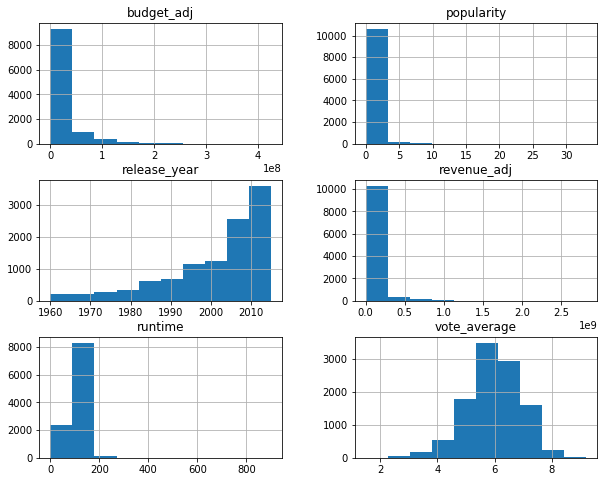

In [14]:
# Review distributions to get a better understanding of the cleaned dataset
df_clean.hist(figsize=(10,8));

- 'budget_adj', 'popularity', 'revenue_adj' and 'runtime' are skewed to the right.

- 'release_year' is skewed to the left

- 'vote_average' has a normal distribution

We now need to take a specific look at the 'genres' column. 

The column 'genres' is in the form of an array with multiple entries parsed by a the character '|'. Let's explore this first to understand the data more:

In [15]:
df_clean.genres.str.count('\|').max()

4

In [16]:
# Looks like as many as 4 '|' characters are used in some instances. Let's review the unique values
df.genres.unique()

array(['Action|Adventure|Science Fiction|Thriller',
       'Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction|Fantasy', ...,
       'Adventure|Drama|Action|Family|Foreign',
       'Comedy|Family|Mystery|Romance',
       'Mystery|Science Fiction|Thriller|Drama'], dtype=object)

In [17]:
df['genres'].value_counts()

Drama                                      712
Comedy                                     712
Documentary                                312
Drama|Romance                              289
Comedy|Drama                               280
                                          ... 
Thriller|Science Fiction|Horror|Mystery      1
Horror|Science Fiction|Mystery               1
Action|Crime|Drama|Romance                   1
Romance|Fantasy|Animation|Music              1
Crime|Action|Comedy                          1
Name: genres, Length: 2039, dtype: int64

There is a wide range of combinations of genres, as one might expect, as a single movie can cover multiple genres. We will need to separate these out for the purpose of understanding the correlations with genre-type. However, there are some considerations to be made.

We can now .split and .explode 'genres' into new rows. This will duplicate the films into new rows, with the individual genres captured on single rows, instead of a group in one row. This is good, however, this does mean we need to be careful when looking at mean values of specific data (other than genre), as there will be duplicates of movies represented in the new dataset, therefore we will give this dataframe a unique name 'df_genres'.

In [18]:
df_genres=df_clean
df_genres['genres']=df_clean['genres'].str.split('|')
df_genres=df_genres.explode('genres')

In [19]:
df_genres.head()

,popularity,runtime,genres,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,124,Action,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,124,Adventure,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,124,Science Fiction,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,124,Thriller,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,120,Action,7.1,2015,1.379999e+08,3.481613e+08


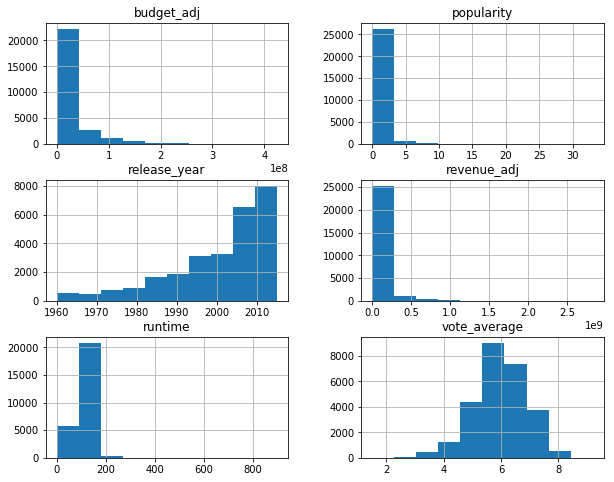

In [20]:
# Review distributions to get a better understanding of the cleaned dataset
df_genres.hist(figsize=(10,8));

No significant change between df_clean and df_genres distributions.

The dataframe 'df_genres' is now cleaned in such a way that genre can be examined graphically, which will be performed in the next section, Exploratory Data Analysis.

<a id='eda'></a>
## Exploratory Data Analysis

Brief:

Note that at least two or more kinds of plots should be created as part of the exploration, and you must compare and show trends in the varied visualizations.

> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 - Which genres are most popular from year to year?

To answer this question, it would be interested to see a graph of genres ploted against populatiry. To do this, we will use the function '.groupby' and '.mean'. As there are a multiple results for movies that contain a common genre, e.g. Adventure, we will use the average (mean) to give us an indication of how certain genres perform with regards to popularity.

In [21]:
# examine mean 'popoularity' grouped by 'genres' using groupby in descending order
df_genres.groupby('genres').popularity.mean().sort_values(ascending=False)

genres
Adventure          1.154259
Science Fiction    1.001548
Fantasy            0.992840
Action             0.926274
Animation          0.852182
Family             0.786668
Crime              0.744930
Thriller           0.741563
War                0.727683
Mystery            0.690012
Comedy             0.592607
Romance            0.592082
Drama              0.591495
Western            0.590615
History            0.575936
Music              0.487321
Horror             0.465357
TV Movie           0.270896
Foreign            0.191496
Documentary        0.181432
Name: popularity, dtype: float64

The three genres with the highest mean popularity are Adventure, Science Fiction and Fantasy.
Let's look at this visualised in a bar chart:

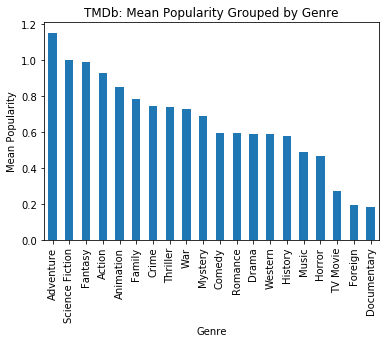

In [22]:
# examine mean 'popularity' grouped by 'genres' using groupby as a bar chart in descending order from left to right
df_genres.groupby('genres').popularity.mean().sort_values(ascending=False).plot.bar();
plt.xlabel('Genre');
plt.ylabel('Mean Popularity');
plt.title('TMDb: Mean Popularity Grouped by Genre');

The graph shows a relatively linear regression in mean 'popularity' from left to right with Adventure on the left and Documentary on the right.

In [23]:
# examine mean 'vote_average' grouped by 'genres' using groupby in descending order
df_genres.groupby('genres').vote_average.mean().sort_values(ascending=False)

genres
Documentary        6.908462
Music              6.480392
History            6.410479
Animation          6.403147
War                6.297778
Drama              6.165546
Crime              6.124889
Western            6.083030
Romance            6.042874
Family             5.997563
Foreign            5.981383
Mystery            5.946790
Adventure          5.940585
Comedy             5.905167
Fantasy            5.863537
TV Movie           5.788024
Action             5.787752
Thriller           5.750671
Science Fiction    5.665582
Horror             5.337447
Name: vote_average, dtype: float64

The three genres with the highest mean 'vote_average' are Documentary, Music and History.
Let's look at this visualised in a bar chart:

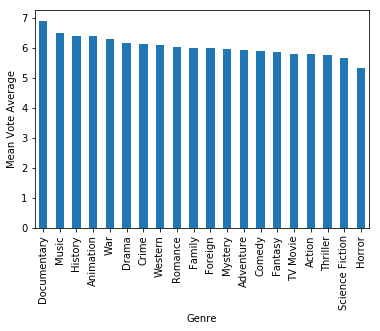

In [24]:
# examine mean 'vote_average' grouped by 'genres' using groupby as a bar chart in descending order from left to right
df_genres.groupby('genres').vote_average.mean().sort_values(ascending=False).plot.bar();
plt.xlabel('Genre');
plt.ylabel('Mean Vote Average');

The graph shows a relatively linear regression in mean 'vote_average' from left to right with Adventure on the left and Documentary on the right.

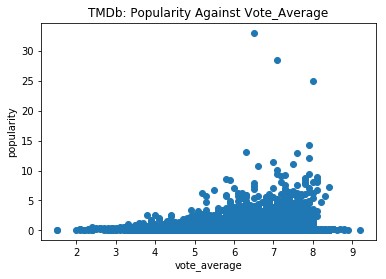

In [25]:
# View correlation between vote_average and popularity
scatterplot(df_clean.vote_average,df_clean.popularity, 'vote_average', 'popularity', 'TMDb: Popularity Against Vote_Average')

There appears to be a number of outliers in the data w.r.t. popularity. These outliers are making it difficult to see a correlation. We can reduce their visual impact by changing the upper limit of the y axis.

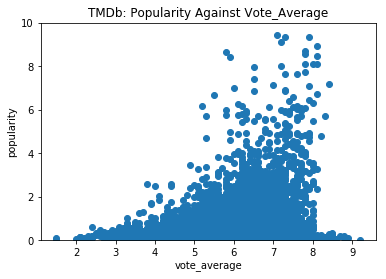

In [26]:
# Reducing the poularity upper limit to 10 to exlude the outliers
scatterplot(df_clean.vote_average,df_clean.popularity, 'vote_average', 'popularity', 'TMDb: Popularity Against Vote_Average')
plt.ylim(0, 10);

That's a little bit better. We can see there is medium correlation between popularity and vote_average, however, there are instances where low poularity movies have a high vote_average. This is assumed to be predominately coming from the 'Documentaries Genre', as we see in earlier graphs, that Documentary are high in vote_average but low in popularity.

### Research Question 2  - What kinds of properties are associated with movies that have high revenues?

In [27]:
# examine mean 'revenue_adj' grouped by 'genres' using groupby in descending order
df_genres.groupby('genres').revenue_adj.mean().sort_values(ascending=False)

genres
Adventure          1.416752e+08
Fantasy            1.112342e+08
Action             9.175827e+07
Family             8.773671e+07
Science Fiction    8.697842e+07
Animation          8.525613e+07
War                6.998611e+07
Crime              5.663641e+07
Thriller           5.528610e+07
Mystery            5.088930e+07
Romance            4.820022e+07
History            4.794858e+07
Comedy             4.789700e+07
Music              4.665592e+07
Western            4.610126e+07
Drama              4.041714e+07
Horror             2.408271e+07
Documentary        2.258210e+06
Foreign            1.784286e+06
TV Movie           3.496353e+05
Name: revenue_adj, dtype: float64

Sticking with genres, the three genres with the highest mean 'revenue_adj' are Adventure, Fantasy and Action. Let's look at this visualised in a bar chart:

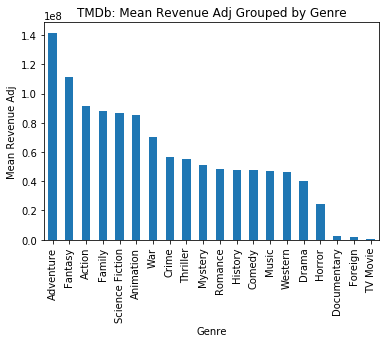

In [28]:
# examine mean 'revenue_adj' grouped by 'genres' using groupby as a bar chart in descending order from left to right
df_genres.groupby('genres').revenue_adj.mean().sort_values(ascending=False).plot.bar();
plt.xlabel('Genre');
plt.ylabel('Mean Revenue Adj');
plt.title('TMDb: Mean Revenue Adj Grouped by Genre');

The graph shows a relatively linear regression in mean 'revenue_adj' from left to right with Adventure on the left and Documentary on the right.

In [29]:
# examine mean 'budget_adj' grouped by 'genres' using groupby in descending order
df_genres.groupby('genres').budget_adj.mean().sort_values(ascending=False)

genres
Adventure          4.393734e+07
Fantasy            3.742932e+07
Action             3.296011e+07
Science Fiction    2.952429e+07
War                2.893007e+07
Family             2.692389e+07
History            2.655802e+07
Animation          2.529535e+07
Western            2.449744e+07
Crime              2.153351e+07
Thriller           2.068296e+07
Mystery            1.948231e+07
Comedy             1.592031e+07
Romance            1.565922e+07
Drama              1.485353e+07
Music              1.298886e+07
Horror             7.764841e+06
Foreign            2.379151e+06
Documentary        6.232226e+05
TV Movie           2.960215e+05
Name: budget_adj, dtype: float64

The three genres with the highest mean 'budget_adj' are Adventure, Fantasy and Action. Noting, this is the same top three ranking as 'revenue_adj'. Let's look at this visualised in a bar chart:

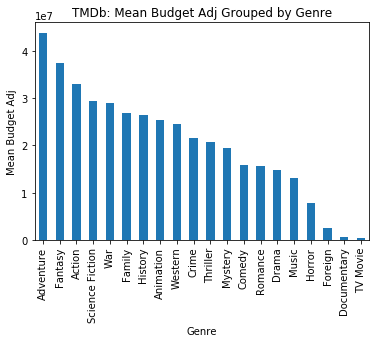

In [30]:
# examine mean 'budget_adj' grouped by 'genres' using groupby as a bar chart in descending order from left to right
df_genres.groupby('genres').budget_adj.mean().sort_values(ascending=False).plot.bar();
plt.xlabel('Genre');
plt.ylabel('Mean Budget Adj');
plt.title('TMDb: Mean Budget Adj Grouped by Genre');

The graph shows a relatively linear regression in mean 'budget_adj' from left to right with Adventure on the left and Documentary on the right.

Let's now look at how 'revenue_adj' has evolved through the years:

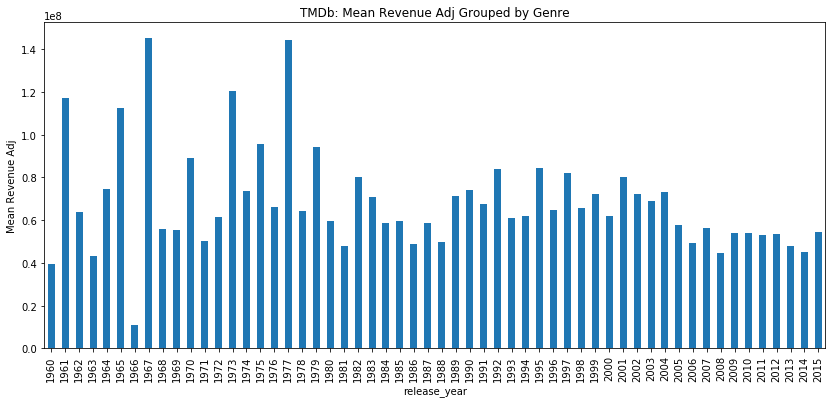

In [31]:
# examine mean 'revenue_adj' grouped by 'release_year' using groupby as a bar chart
df_genres.groupby('release_year').revenue_adj.mean().plot(kind='bar',figsize=(14,6));
plt.ylabel('Mean Revenue Adj');
plt.title('TMDb: Mean Revenue Adj Grouped by Genre');

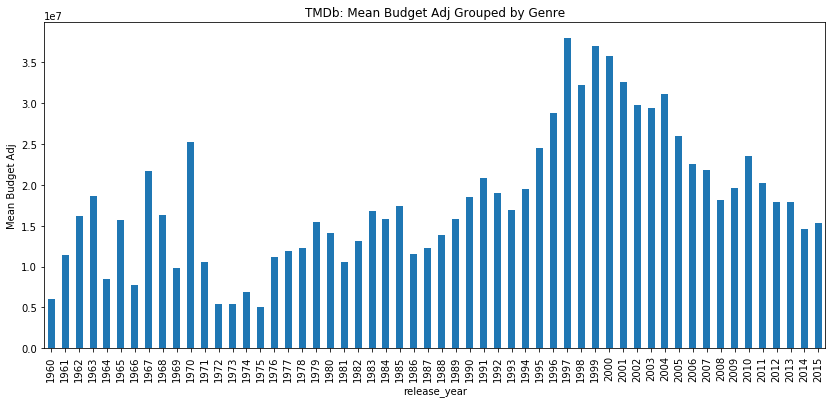

In [32]:
# examine mean 'budget_adj' grouped by 'release_year' using groupby as a bar chart
df_genres.groupby('release_year').budget_adj.mean().plot(kind='bar',figsize=(14,6));
plt.ylabel('Mean Budget Adj');
plt.title('TMDb: Mean Budget Adj Grouped by Genre');

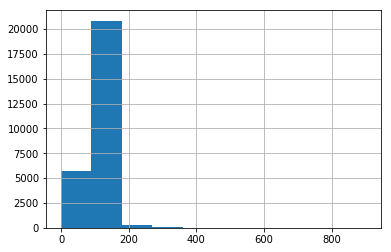

In [33]:
# quick reminder of runtime distribution
df_genres.runtime.hist();

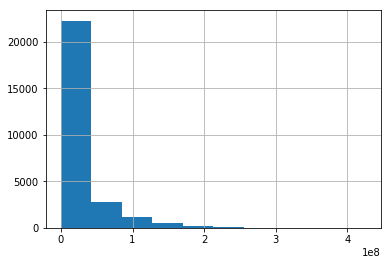

In [34]:
# quick reminder of budget_adj distribution
df_genres.budget_adj.hist();

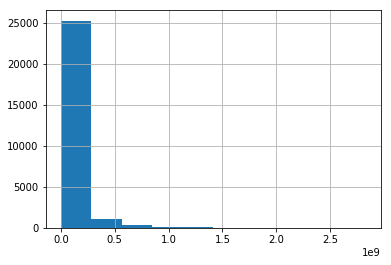

In [35]:
# quick reminder of renue_adj distribution
df_genres.revenue_adj.hist();

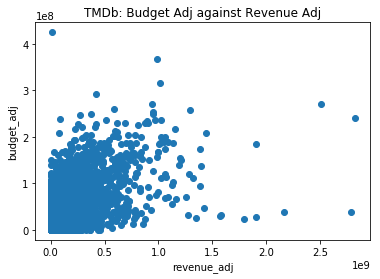

In [36]:
# View correlation between 'revenue_adj' and 'budget_adj'
scatterplot(df_clean.revenue_adj,df_clean.budget_adj, 'revenue_adj', 'budget_adj', 'TMDb: Budget Adj against Revenue Adj')

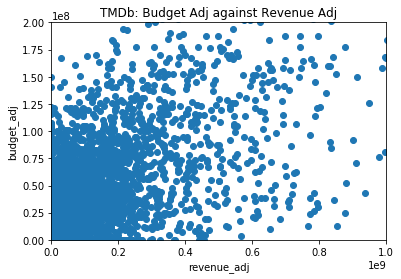

In [37]:
# View correlation between vote_average and popularity
scatterplot(df_clean.revenue_adj,df_clean.budget_adj, 'revenue_adj', 'budget_adj', 'TMDb: Budget Adj against Revenue Adj')
plt.xlim(0, 1000000000);
plt.ylim(0, 200000000);

There does appear to be some correlation between revenue and budget, however it is not as strong as predicted.

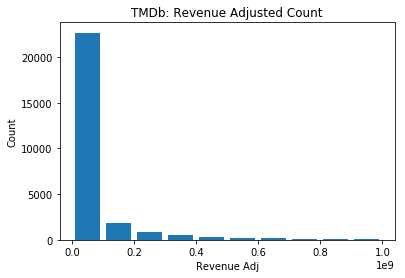

In [38]:
# examine revenue adj more closely
bins = [0,100000000,200000000,300000000,400000000,500000000,600000000,700000000,800000000,900000000,1000000000]
plt.hist(df_genres.revenue_adj, bins, histtype='bar', rwidth=0.8);
plt.xlabel('Revenue Adj');
plt.ylabel('Count');
plt.title('TMDb: Revenue Adjusted Count');

In [39]:
# check to see upper limit
df_genres.revenue_adj.max()

2827123750.41189

In [40]:
# Considering this max revenue of 2827123750.41189 an outlier, and will be removed from the bins to help plots

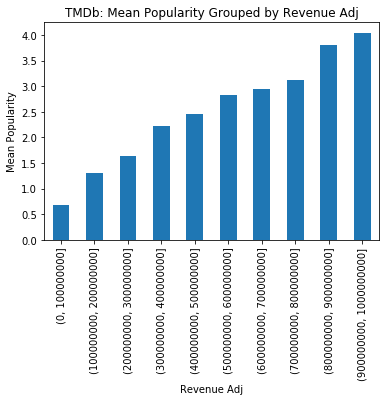

In [41]:
# mean 'popularity' grouped by 'revenue_adj' using bins 
bins = [0,100000000,200000000,300000000,400000000,500000000,600000000,700000000,800000000,900000000,1000000000] # 1 billion limit
df_genres.groupby(pd.cut(df_genres.revenue_adj,bins)).popularity.mean().plot(kind='bar');
plt.xlabel('Revenue Adj');
plt.ylabel('Mean Popularity');
plt.title('TMDb: Mean Popularity Grouped by Revenue Adj');

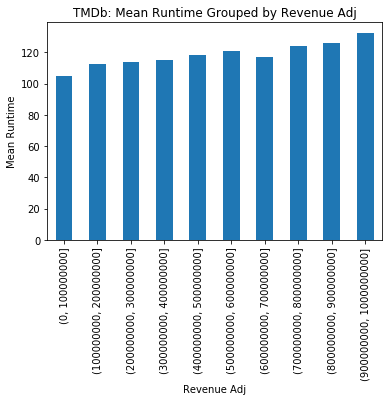

In [42]:
# mean 'runtime' grouped by 'revenue_adj' using bins
bins = [0,100000000,200000000,300000000,400000000,500000000,600000000,700000000,800000000,900000000,1000000000]
df_genres.groupby(pd.cut(df_genres.revenue_adj,bins)).runtime.mean().plot(kind='bar');
plt.xlabel('Revenue Adj');
plt.ylabel('Mean Runtime');
plt.title('TMDb: Mean Runtime Grouped by Revenue Adj');

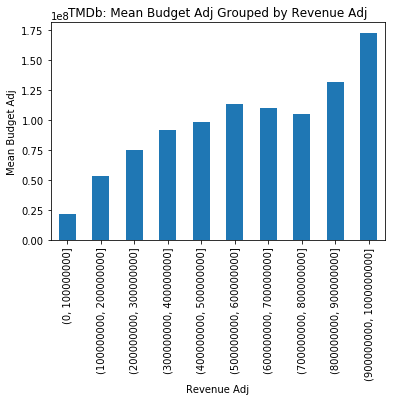

In [43]:
# mean 'budget_adj' grouped by 'revenue_adj' using bins
bins = [0,100000000,200000000,300000000,400000000,500000000,600000000,700000000,800000000,900000000,1000000000]
df_genres.groupby(pd.cut(df_genres.revenue_adj,bins)).budget_adj.mean().plot(kind='bar');
plt.xlabel('Revenue Adj');
plt.ylabel('Mean Budget Adj');
plt.title('TMDb: Mean Budget Adj Grouped by Revenue Adj');

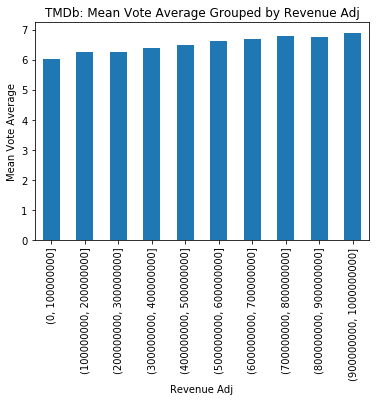

In [44]:
# mean 'vote_average' grouped by 'revenue_adj' using bins
bins = [0,100000000,200000000,300000000,400000000,500000000,600000000,700000000,800000000,900000000,1000000000]
df_genres.groupby(pd.cut(df_genres.revenue_adj,bins)).vote_average.mean().plot(kind='bar');
plt.xlabel('Revenue Adj');
plt.ylabel('Mean Vote Average');
plt.title('TMDb: Mean Vote Average Grouped by Revenue Adj');

<a id='conclusions'></a>
## Conclusions

This study has looked at a TMDb dataset to investigate two questions:
Research Question 1 - Which genres are most popular from year to year?
Research Question 2 - What kinds of properties are associated with movies that have high revenues?

To begin with, the data was wrangled, whereby the data was cleaned, dropping arbtirary columns, duplicates, nullvalues and splitting genres into new rows.

The data was then explored to help answer the two questions given in the brief. These are the following conclusions.

### Research Question 1 - Which genres are most popular from year to year?

The top three genres with regards to mean popularity are:

- Adventure          1.154259
- Science Fiction    1.001548
- Fantasy            0.992840

The top three genres with regards to mean vote_average are:

- Documentary        6.908462
- Music              6.480392
- History            6.410479

The top three genres with regards to mean budget_adj are:

- Adventure          4.393734e+07
- Fantasy            3.742932e+07
- Action             3.296011e+07

Two of the most popular genres correlate with being two of the top three budget_adj.

Popularity appears to correlate with vote_average, althoguh there are some exeptions, such as Documentary movies, which have a very low popularity and a high vote_average. This is assumed to be due to cinemas generally not playing documentaries compared to movies.

### Research Question 2 - What kinds of properties are associated with movies that have high revenues?

A closely look at revenue:
- A plot of mean popularity against bins of ascending revenue_adj shows that there is a strong and linear trend between movies with high popularity and movies with high revenues.
- A plot of mean runtime against bins of ascending revenue_adj shows that there is a medium-strong and semi-linear trend between movies with high runtimes and movies with high revenues.
- A plot of mean budget_adj against bins of ascending revenue_adj shows that there is a medium-strong and semi-linear trend between movies with high budgets and movies with high revenues.
- A plot of mean vote_average against bins of ascending revenue_adj shows that there is a medium-strong and linear trend between movies with high vote averages and movies with high revenues.

Documentaries receive the highest vote_average despite being one of the lowest in popularity. This is assumed to be a result of cinemas not showing documentaries in the same way that movies are shown.

Additional research could be made into director to determine which directors correlate with popular and highly rated movies for example. Similar studies could be made into production_companies and keyword search. For example, keywords such as, "monster" or "80s".

There is a general correlation between budget and revnue but it's not as strong as predicted, with many outliers.

## Limitation of the analysis

The TMDb dataset does not provide user data, or any indication whether these users are representative of the population of the entire planet. For example, these users could be skewed towards one county (e.g. USA), a particularly age group (e.g. 16-24), or a particularly gender (e.g. male). For example, it could be theorised, that a predominantly young, male, english-speaking userbase might favour american-made fantasy movies.

This theory would need to be substantiated, of course. Until such demographic data exists, data such as 'vote_average' should be treated with some caution, by acknowledging this limitation. Other, more objective figures, are less likely to be distorted by any user bias, such as 'revenue', 'budget', 'director', 'runtime'. However, this does not mean one can treat this data as 100% accurate, as these figures could be inadvertandly or advertendly distorted by such factors as, human error, computer error, or corruption. Regarding the latter factor, humans wanting to misrepresent the figures for personal, financial, and/or business reasons, for example, a member of the board of a particular production company, may not want low revenue or low popularity declared internally or publicly, and could seek to tamper with the figures shared internally or publically for reasons of self-preservation, in other words, to not be fired/humiliated.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [45]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0